In [0]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
#Import dataset
dataset_train = pd.read_csv('Google_stock_train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [0]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [0]:
#60 timestamps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
#Reshape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:
#Import Keras library and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [0]:
#Initialise RNN
regressor = Sequential()

In [0]:
#First layer and Dropout Regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [0]:
#Second layer and Dropout Regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [0]:
#Third layer and Dropout Regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [0]:
#Fourth layer and Dropout Regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [0]:
#Output Layer
regressor.add(Dense(units = 1))

In [0]:
#Compile RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [14]:
#Fit RNN to training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0051
Epoch 2/100
1198/1198 [==============================] - 5s 4ms/step - loss: 8.7087e-04
Epoch 3/100
1198/1198 [==============================] - 5s 4ms/step - loss: 6.8032e-04
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 6.6476e-04
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 6.3761e-04
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 6.6647e-04
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 6.4755e-04
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 5.6710e-04
Epoch 9/100
1198/1198 [==============================] - 5s 5ms/step - loss: 5.1907e-04
Epoch 10/100
1198/1198 [==============================] - 5s 4ms/step - loss: 5.0182e-04
Epoch 11/100
1198/1198 [==============================] - 5s 4ms/step - loss: 5.1612e-04
Epoch 12/100
1198/1198 [==========

In [0]:
#Real Stock Price of May 2020
dataset_test = pd.read_csv('Google_stock_test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [0]:
#Predicted Stock Price of May 2020
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

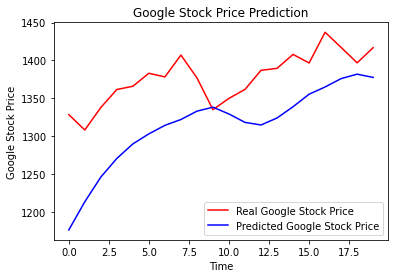

In [17]:
#Results Visualisation
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()